In [58]:
import numpy as np
import matplotlib.pyplot as plt

## TODO
1. 

### Question 1
#### 1.a
$Y_{ijk} = \mu_{ij} + \epsilon_{ijk}$

Where:
- $ Y_{ijk} $ is the response variable for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \mu_{ij} $ is the mean effect for the combination of the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \epsilon_{ijk} $ is the random error associated with the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate

**Assumptions:**
1. Independence: The observations are independent of each other. This means the data collected for one cell does not influence the data collected for another.
2. Normality: The random errors $ \epsilon_{ijk} $ are normally distributed.
3. Homoscedasticity: The variances of the error terms are constant across all levels of the factors.
4. Fixed Effects: In this model, both factors are considered to have fixed effects. This means that the levels of each factor are specifically chosen by the experimenter and are of primary interest.
5. No Interactions (in the basic model): This assumption means that the effect of one factor is consistent at all levels of the other factor.

#### 1.b

**ANOVA Table:**
| Source      | Sum of Squares (SS)                   | Degrees of Freedom (df) |
|-------------|--------------------------------------|--------------------------|
| Model       | $n.\Sigma\Sigma(\bar{Y}_{ij.} - \bar{Y}_{...})^2$   | ab - 1    |
| Error       | $\Sigma\Sigma\Sigma(Y_{ijk} - \bar{Y}_{ij.})^2$     | ab(n - 1) |
| Total       | $\Sigma\Sigma\Sigma(Y_{ijk} - \bar{Y}_{...})^2$     | abn - 1   |

Where:
- $ Y_{ijk} $ is the observation for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \bar{Y}_{ij.} $ is the mean for the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \bar{Y}_{...} $ is the overall mean of all observations.
- $ a $ and $ b $ are the number of levels in Factor A and Factor B, respectively.
- $ n $ is the number of replicates per cell

**Null Hypothesis to be tested with this table:**
- The null hypothesis is that all cell means are equal, i.e., there are no effects of the factors or their interaction on the dependent variable.
$ H_0: \mu_{ij} = \mu $ for all $ i $ and $ j $.

#### 1.c
The model can be expressed in matrix form as:  $ Y = X\mu + \epsilon $
1. **Vector Y (Response Vector)**:
   - Y is an 18x1 vector, representing the observations. 
   $$ Y = [Y_{111}, Y_{112}, Y_{121}, Y_{122}, Y_{131}, Y_{132}, Y_{211}, Y_{212}, Y_{221}, Y_{222}, Y_{231}, Y_{232}, Y_{311}, Y_{312}, Y_{321}, Y_{322}, Y_{331}, Y_{332}]^T$$


2. **Design Matrix X**:
   - X is an 18x9 matrix.
   $$
   X =
      \begin{bmatrix}
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
      \end{bmatrix}
   $$

3. **Vector of Parameters μ (Mean Effects Vector)**:
   - $\mu$ is a 9x1 vector, representing the mean effect for each of the nine combinations of factor levels.
   $$ \mu = [\mu_{11}, \mu_{12}, \mu_{13}, \mu_{21}, \mu_{22}, \mu_{23}, \mu_{31}, \mu_{32}, \mu_{33}]^T$$

4. **Vector of Errors ε (Error Vector)**:
   - ε is an 18x1 vector, representing the error associated with each observation.
   $$ \epsilon = [\epsilon_{111}, \epsilon_{112}, \epsilon_{121}, \epsilon_{122}, \epsilon_{131}, \epsilon_{132}, \epsilon_{211}, \epsilon_{212}, \epsilon_{221}, \epsilon_{222}, \epsilon_{231}, \epsilon_{232}, \epsilon_{311}, \epsilon_{312}, \epsilon_{321}, \epsilon_{322}, \epsilon_{331}, \epsilon_{332}]^T$$

#### 1.d
To write the vector of coefficients $ C $ for the linear regression contrast $ L = \mu_{12} - \mu_{13} $, we need to represent this in terms of the parameter vector $ \mu $. 

$$ \mu = [\mu_{11}, \mu_{12}, \mu_{13}, \mu_{21}, \mu_{22}, \mu_{23}, \mu_{31}, \mu_{32}, \mu_{33}]^T $$

$ L = \mu_{12} - \mu_{13} $ focuses on the difference between the mean effects for the second and third level of factor A while holding factor B at its first level. This can be expressed as a linear combination of the elements of $ \mu $:
$$ L = 0 \cdot \mu_{11} + 1 \cdot \mu_{12} - 1 \cdot \mu_{13} + 0 \cdot \mu_{21} + 0 \cdot \mu_{22} + 0 \cdot \mu_{23} + 0 \cdot \mu_{31} + 0 \cdot \mu_{32} + 0 \cdot \mu_{33} $$

The vector of coefficients $ C $ in the linear regression model is:
$$ C = [0, 1, -1, 0, 0, 0, 0, 0, 0]^T $$

#### 1.e
The two-way factorial effects model with zero-sum constraints:

$$ Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk} $$

Where:
- $ Y_{ijk} $ is the response for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \mu $ is the overall mean response.
- $ \alpha_i $ is the effect of the $ i $-th level of factor A.
- $ \beta_j $ is the effect of the $ j $-th level of factor B.
- $ (\alpha\beta)_{ij} $ is the interaction effect between the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \epsilon_{ijk} $ is the random error.

**Assumptions:**
1. Independence: Observations are independent of each other.
2. Normality: The error terms $ \epsilon_{ijk} $ are normally distributed with a mean of 0.
3. Homoscedasticity: The error terms have constant variance $ \sigma^2 $ across all levels of the factors.
4. Fixed Effects: Both factors are treated as fixed effects.

**Distributional Assumptions:**
- $ \epsilon_{ijk} \sim N(0, \sigma^2) $: The errors are normally distributed with mean 0 and variance $ \sigma^2 $.

**Zero-Sum Constraints:**
- $ \sum_{i=1}^{a} \alpha_i = 0 $: The sum of the effects of all levels of factor A is zero.
- $ \sum_{j=1}^{b} \beta_j = 0 $: The sum of the effects of all levels of factor B is zero.
- $ \sum_{i=1}^{a} (\alpha\beta)_{ij} = 0 $ for each j: The sum of the interaction effects for each level of factor B is zero.
- $ \sum_{j=1}^{b} (\alpha\beta)_{ij} = 0 $ for each i: The sum of the interaction effects for each level of factor A is zero.

#### 1.f


| Source          | Sum of Squares (SS)                                                         | Degrees of Freedom (df) |
|-----------------|-------------------------------------------------------------------------------------|-----------------|
| Factor A        | $SSA = bn.\Sigma(\alpha_i)^2$                                                       |  a - 1          |
| Factor B        | $SSB = an.\Sigma(\beta_j)^2$                                                          |  b - 1          |
| Interaction AxB | $SSAB = n.\Sigma\Sigma(\alpha\beta_{ij})^2$                                         | (a - 1)(b - 1)  |
| Error           | $SSE = \Sigma\Sigma\Sigma(Y_{ijk} - \bar{Y}_{ij.})^2$ | ab(n - 1)       |
| Total           | $SSTO = \Sigma\Sigma\Sigma(Y_{ijk} - Y_{...})^2$                                    | abn - 1         |

Where:
- $ Y_{ijk} $ is the observation for the $ i $-th level of Factor A, $ j $-th level of Factor B, and $ k $-th replicate.
- $ α_i $, $ β_j $, and $ αβ_{ij} $ are the effects of Factor A, Factor B, and their interaction, respectively.
- $ a $ and $ b $ are the number of levels in Factor A and Factor B, respectively.
- $ n $ is the number of replicates per cell.

**Null Hypotheses to be tested with this table:**
1. **For Factor A**: $ H_{0A}: $ All levels of Factor A have the same effect, i.e., $ α_1 = α_2 = ... = α_a = 0 $.
2. **For Factor B**: $ H_{0B}: $ All levels of Factor B have the same effect, i.e., $ β_1 = β_2 = ... = β_b = 0 $.
3. **For Interaction AxB**: $ H_{0AB}: $ There is no interaction between Factors A and B, i.e., all $ αβ_{ij} = 0 $ for each combination of $ i $ and $ j $.

#### 1.g
The model can be expressed in matrix form as:  $ Y = X\mu + \epsilon $
1. **Vector Y (Response Vector)**:
   - Y is an 18x1 vector, representing the observations. 
   $$ Y = [Y_{111}, Y_{112}, Y_{121}, Y_{122}, Y_{131}, Y_{132}, Y_{211}, Y_{212}, Y_{221}, Y_{222}, Y_{231}, Y_{232}, Y_{311}, Y_{312}, Y_{321}, Y_{322}, Y_{331}, Y_{332}]^T$$

2. **Design Matrix X**:
    - X is an 18x9 matrix. (1 + (a-1) + (b-1) + (a-1)(b-1)) = 9
   $$
   X =
      \begin{bmatrix}
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 1 & 0 & -1 & -1 & -1 & -1 & 0 & 0 \\
      1 & 1 & 0 & -1 & -1 & -1 & -1 & 0 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      1 & 0 & 1 & -1 & -1 & 0 & 0 & -1 & -1 \\
      1 & 0 & 1 & -1 & -1 & 0 & 0 & -1 & -1 \\
      1 & -1 & -1 & 1 & 0 & -1 & 0 & -1 & 0 \\
      1 & -1 & -1 & 1 & 0 & -1 & 0 & -1 & 0 \\
      1 & -1 & -1 & 0 & 1 & 0 & -1 & 0 & -1 \\
      1 & -1 & -1 & 0 & 1 & 0 & -1 & 0 & -1 \\
      1 & -1 & -1 & -1 & -1 & 1 & 1 & 1 & 1 \\
      1 & -1 & -1 & -1 & -1 & 1 & 1 & 1 & 1 \\
      \end{bmatrix}
   $$

3. **Vector of Parameters μ (Parameter Vector)**:
   - It is a 9x1 vector
   $$ \mu = [\mu, \alpha_1, \alpha_2, \beta_1, \beta_2, (\alpha\beta)_{11}, (\alpha\beta)_{12}, (\alpha\beta)_{21}, (\alpha\beta)_{22}]^T $$

4. **Vector of Errors ε (Error Vector)**:
   - $\epsilon$ is an 18x1 vector, representing the random error associated with each observation.
   $$ \epsilon = [\epsilon_{111}, \epsilon_{112}, \epsilon_{121}, \epsilon_{122}, \epsilon_{131}, \epsilon_{132}, \epsilon_{211}, \epsilon_{212}, \epsilon_{221}, \epsilon_{222}, \epsilon_{231}, \epsilon_{232}, \epsilon_{311}, \epsilon_{312}, \epsilon_{321}, \epsilon_{322}, \epsilon_{331}, \epsilon_{332}]^T$$

#### 1.h
$$ \mu = [\mu, \alpha_1, \alpha_2, \beta_1, \beta_2, (\alpha\beta)_{11}, (\alpha\beta)_{12}, (\alpha\beta)_{21}, (\alpha\beta)_{22}]^T $$

$ L = \mu_{12} - \mu_{13} $

- $ \mu_{12} $ is the mean response for the first level of Factor A and the second level of Factor B.
- $ \mu_{13} $ is the mean response for the first level of Factor A and the third level of Factor B.

We can express $ \mu_{12} $ and $ \mu_{13} $ as:
- $ \mu_{12} = \mu + \alpha_1 + \beta_2 + (\alpha\beta)_{12} $
- $ \mu_{13} = \mu + \alpha_1 + \beta_3 + (\alpha\beta)_{13} $
- $ \beta_3 = -\beta_1 - \beta_2 $
- $ (\alpha\beta)_{13} = -(\alpha\beta)_{11} - (\alpha\beta)_{12} $

The contrast $ L = \mu_{12} - \mu_{13} $:
$$ L = (\beta_2 - \beta_3) + ((\alpha\beta)_{12} - (\alpha\beta)_{13}) $$
$$ L = (\beta_2 - (-\beta_1 - \beta_2))) + ((\alpha\beta)_{12} - (-(\alpha\beta)_{11} - (\alpha\beta)_{12})) $$
$$ L = 2.\beta_2 + \beta_1 + 2.\alpha\beta_{12} + \alpha\beta_{11} $$

We identify the coefficients that multiply each component of $ \mu $ to achieve this contrast:
$$ C = [0, 0, 0, 1, 2, 1, 2, 0, 0]^T $$

#### 1.i
The two-way factorial effects model with reference constraints:
$$ Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk} $$

Where:
- $ Y_{ijk} $ is the response for the $ i $-th level of factor A, the $ j $-th level of factor B, and the $ k $-th replicate.
- $ \mu $ is the overall mean response.
- $ \alpha_i $ is the effect of the $ i $-th level of factor A relative to the reference level of factor A.
- $ \beta_j $ is the effect of the $ j $-th level of factor B relative to the reference level of factor B.
- $ (\alpha\beta)_{ij} $ is the interaction effect between the $ i $-th level of factor A and the $ j $-th level of factor B.
- $ \epsilon_{ijk} $ is the random error.

**Assumptions:**
1. Independence: Observations are independent of each other.
2. Normality: The error terms $ \epsilon_{ijk} $ are normally distributed with a mean of 0.
3. Homoscedasticity: The error terms have constant variance $ \sigma^2 $ across all levels of the factors.
4. Fixed Effects: Both factors are treated as fixed effects.

**Distributional Assumptions:**
- $ \epsilon_{ijk} \sim N(0, \sigma^2) $: The errors are normally distributed with mean 0 and variance $ \sigma^2 $.

**Reference (One-Hot) Constraints:**
- One level of each factor is chosen as the reference level. Typically, the first level is chosen.
- For Factor A: $ \alpha_1 = 0 $ (if the first level is the reference).
- For Factor B: $ \beta_1 = 0 $ (if the first level is the reference).
- For the interaction terms: $ (\alpha\beta)_{i1} = (\alpha\beta)_{1j} = 0 $ for all $ i $ and $ j $, which means that interaction effects involving the reference levels are set to zero.

#### 1.j
The model can be expressed in matrix form as:  $ Y = X\mu + \epsilon $

1. **Vector Y (Response Vector)**:
   - Y is an 18x1 vector, representing the observations. 
   $$ Y = [Y_{111}, Y_{112}, Y_{121}, Y_{122}, Y_{131}, Y_{132}, Y_{211}, Y_{212}, Y_{221}, Y_{222}, Y_{231}, Y_{232}, Y_{311}, Y_{312}, Y_{321}, Y_{322}, Y_{331}, Y_{332}]^T$$


2. **Design Matrix X**:
   - X is an 18x9 matrix. (1 + (a-1) + (b-1) + (a-1)(b-1)) = 9
   $$
   X =
      \begin{bmatrix}
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\
      1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
      \end{bmatrix}
   $$

3. **Vector of Parameters μ (Parameter Vector)**:
   - The parameter vector is a 9x1 vector
   $$ \mu = [\mu, \alpha_2, \alpha_3, \beta_2, \beta_3, (\alpha\beta)_{22}, (\alpha\beta)_{23}, (\alpha\beta)_{32}, (\alpha\beta)_{33}]^T $$

4. **Vector of Errors ε (Error Vector)**:
   - ε is an 18x1 vector, representing the random error associated with each observation.
   $$ \epsilon = [\epsilon_{111}, \epsilon_{112}, \epsilon_{121}, \epsilon_{122}, \epsilon_{131}, \epsilon_{132}, \epsilon_{211}, \epsilon_{212}, \epsilon_{221}, \epsilon_{222}, \epsilon_{231}, \epsilon_{232}, \epsilon_{311}, \epsilon_{312}, \epsilon_{321}, \epsilon_{322}, \epsilon_{331}, \epsilon_{332}]^T$$

#### 1.k
$$ \mu = [\mu, \alpha_2, \alpha_3, \beta_2, \beta_3, (\alpha\beta)_{22}, (\alpha\beta)_{23}, (\alpha\beta)_{32}, (\alpha\beta)_{33}]^T $$

$ L = \mu_{12} - \mu_{13} $

- $ \mu_{12} $ is the mean response for the first level of Factor A and the second level of Factor B.
- $ \mu_{13} $ is the mean response for the first level of Factor A and the third level of Factor B.

We can express $ \mu_{12} $ and $ \mu_{13} $ as:
- $ \mu_{12} = \mu + \alpha_1 + \beta_2 + (\alpha\beta)_{12} $
- $ \mu_{13} = \mu + \alpha_1 + \beta_3 + (\alpha\beta)_{13} $
- $ \alpha1 = 0 $ (reference constraint)
- $ (\alpha\beta)_{12} = (\alpha\beta)_{13} = 0 $ (reference constraint)

The contrast $ L = \mu_{12} - \mu_{13} $:
$$ L = \beta_2 - \beta_3$$

We identify the coefficients that multiply each component of $ \mu $ to achieve this contrast:
$$ C = [0, 0, 0, 1, -1, 0, 0, 0, 0]^T $$

### Question 2
#### 2.a

In [51]:
def linear_regression_with_reference(data):
    """
        Performs linear regression on a multi-level, 2-factor experimental design
        with a reference constraint (u11)
        param data: A numpy array of the format [[Y, i, j, k], [Y, i, j, k], ...]
        :return: A numpy array of estimated coefficients
    """
    # Get the number of observations
    n = len(data)

    # Extract response and factor levels
    Y = data[:, 0]
    level_A = data[:, 1]
    level_B = data[:, 2]

    # determine number of levels for each factor
    num_levels_A = np.size(np.unique(level_A))
    num_levels_B = np.size(np.unique(level_B))

    # create design matrix A
    num_columns = 1 + (num_levels_A - 1) + (num_levels_B - 1) + (num_levels_A - 1) * (num_levels_B - 1)
    X = np.ones((n, num_columns))

    # main effects
    for i in range(1, num_levels_A):
        X[:, i] = (level_A == (i+1)).astype(int)

    for j in range(1, num_levels_B):
        X[:, num_levels_A - 1 + j] = (level_B == (j+1)).astype(int)

    # interaction effects
    for i in range(1, num_levels_A):
        for j in range(1, num_levels_B):
            col_idx = (num_levels_A - 1) + (num_levels_B - 1) + (i - 1) * (num_levels_B - 1) + j
            X[:, col_idx] = ((level_A == (i+1)) & (level_B == (j+1))).astype(int)

    # solve for coefficients
    mu_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

    return mu_hat

#### 2.b

In [55]:
def calculate_contrast(mu_hat, contrast_vector):
    """
    Calculates the contrast given the estimated parameters and a contrast vector.

    :param mu_hat: Estimated parameters.
    :param contrast_vector: A vector defining the linear combination of the parameters.
    :return: The calculated contrast value.
    """
    return np.dot(contrast_vector, mu_hat)

In [56]:
def calculate_contrast_standard_error(X, mu_hat, Y, contrast_vector):
    """
    Calculates the standard error of a contrast.

    :param X: Design matrix.
    :param mu_hat: Estimated parameters.
    :param Y: Response vector.
    :param contrast_vector: Contrast vector.
    :return: The standard error of the contrast.
    """
    # Calculate residuals
    residuals = Y - np.dot(X, mu_hat)

    # Calculate mean squared error
    residual_variance = np.dot(residuals, residuals) / (X.shape[0] - X.shape[1])

    # calculate variance - covariance matrix
    var_covar = residual_variance * np.linalg.inv(np.dot(X.T, X))

    # contrast_variance = residual_variance * np.dot(
    #     np.dot(contrast_vector, np.linalg.inv(np.dot(X.T, X))), contrast_vector.T
    # )

    # calculate contrast variance
    contrast_variance = np.dot(
        np.dot(contrast_vector, var_covar), contrast_vector.T
    )

    return np.sqrt(contrast_variance)

### Question 3

In [57]:
data = np.array(
    [
        [2.4, 1, 1, 1],
        [2.7, 1, 1, 2],
        [2.3, 1, 1, 3],
        [2.5, 1, 1, 4],
        [4.6, 1, 2, 1],
        [4.2, 1, 2, 2],
        [4.9, 1, 2, 3],
        [4.7, 1, 2, 4],
        [4.8, 1, 3, 1],
        [4.5, 1, 3, 2],
        [4.4, 1, 3, 3],
        [4.6, 1, 3, 4],
        [5.8, 2, 1, 1],
        [5.2, 2, 1, 2],
        [5.5, 2, 1, 3],
        [5.3, 2, 1, 4],
        [8.9, 2, 2, 1],
        [9.1, 2, 2, 2],
        [8.7, 2, 2, 3],
        [9.0, 2, 2, 4],
        [9.1, 2, 3, 1],
        [9.3, 2, 3, 2],
        [8.7, 2, 3, 3],
        [9.4, 2, 3, 4],
        [6.1, 3, 1, 1],
        [5.7, 3, 1, 2],
        [5.9, 3, 1, 3],
        [6.2, 3, 1, 4],
        [9.9, 3, 2, 1],
        [10.5, 3, 2, 2],
        [10.6, 3, 2, 3],
        [10.1, 3, 2, 4],
        [13.5, 3, 3, 1],
        [13.0, 3, 3, 2],
        [13.3, 3, 3, 3],
        [13.2, 3, 3, 4],
    ],
    dtype=float,
)


#### 3.a
Randomization in the context of experimental design is important to ensure validity of the results and claim causality.

**How to Randomize:**
1. List all treatment combination of the levels of factors A and B. There are 3 levels of factor A and 3 levels of factor B, resulting in 9 combinations (3x3).
2. Assign volunteers to treatments:
    - Each volunteer is assigned to a treatment combination in a random and unbiased order.
    - This can be done by using random number generators, or shuffling.
    - Allocate equal number of volunteers to each treatment combination.

**Why is randomization important:**
1. Controls for confounding variables: Randomization ensures that any other variables (known or unknown) that might affect the outcome are equally distributed across all treatment groups.
2. Reduces Bias: By randomly assigning volunteers to treatments, we reduce the risk of systematic bias in the allocation process.
3. Increases Generalizability: By randomizing, we increase the likelihood that the study results are generalizable to a wider population, as the sample within each treatment group is more likely to be representative of the population.

#### 3.b

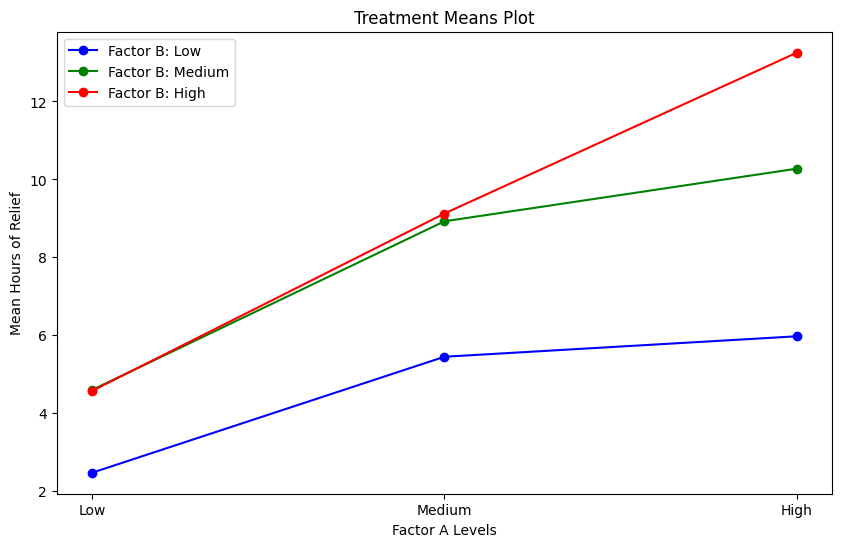

In [70]:
# calculate mean responses for each level of factors A and B
levels_A = np.unique(data[:, 1])
levels_B = np.unique(data[:, 2])

means = np.zeros((len(levels_A), len(levels_B)))

for i in range(len(levels_B)):
    for j in range(len(levels_A)):
        # Filter data for current combination of levels
        filtered_data = data[(data[:, 1] == levels_A[j]) & (data[:, 2] == levels_B[i])]

        # Calculate mean response
        mean_response = np.mean(filtered_data[:, 0])
        means[i, j] = mean_response

factor_B_levels = ["Low", "Medium", "High"]
factor_B_colors = ["blue", "green", "red"]

# Creating the plot
plt.figure(figsize=(10, 6))
for i in range(len(factor_B_colors)):
    plt.plot(
        factor_B_levels,
        means[i, :],
        marker="o",
        color=factor_B_colors[i],
        label=f"Factor B: {factor_B_levels[i]}",
    )

plt.xlabel("Factor A Levels")
plt.ylabel("Mean Hours of Relief")
plt.title("Treatment Means Plot")
plt.legend()
plt.show()

Based on the plot above, both factor A and factor B have main effects as well as interaction effects on the response.

**Main Effects**
1. Factor A: We see an upward trend as we move from low to high levels of Factor A. This suggests that higher levels of ingredient 1 are associated with more hours of relief, indicating that the Factor A has a main effect on response.
2. Factor B: Low and High levels of Factor B show different starting points and trends, indicating that the Factor B has a main effect on response.

**Interaction Effects**
1. The lines are not parallel, indicating that there is an interaction effect between the two factors.
2. Specifically, the difference between medium and high levels of factor B is higher at High levels of factor A. This suggests that, there is interaction between factor A and factor B.

[2.475 2.975 3.5   2.125 2.1   1.35  1.575 2.175 5.175]
